In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Question1

### a)

In [ ]:
def compute_normalized_histogram(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 256), density=True)
    return hist

In [ ]:
def entropy(pmf):

    pmf = np.array(pmf)
    pmf = pmf[pmf > 0]

    entropy_value = -np.sum(pmf * np.log2(pmf))

    return entropy_value

In [ ]:
def kl_divergence(p, q):
    p = np.array(p)
    q = np.array(q)

    p = np.where(p == 0, 1e-10, p)
    q = np.where(q == 0, 1e-10, q)

    return np.sum(p * np.log(p / q))

In [ ]:
left_image = np.asarray(Image.open('left.png'))
right_image = np.asarray(Image.open('right.png'))

p_hist = compute_normalized_histogram(left_image)
q_hist = compute_normalized_histogram(right_image)

In [ ]:
def cross_entropy(p,q):

    return entropy(p)+kl_divergence(p,q)


In [ ]:
cross_entropy(p_hist,q_hist)

7.268763410326868

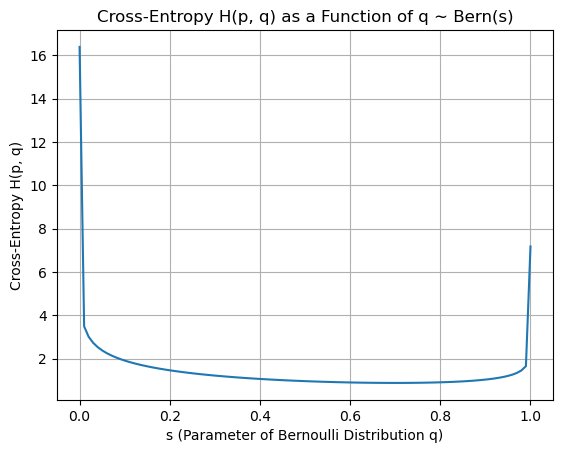

In [ ]:
def bernoulli_pmf(prob):
    return np.array([prob, 1 - prob])

r = 0.7

# Define PMF p
p = bernoulli_pmf(r)

s_values = np.linspace(0, 1, 100)

# Calculate cross-entropy for each s
cross_entropy_values = []

for s in s_values:
    q = bernoulli_pmf(s)
    ce = cross_entropy(p, q)
    cross_entropy_values.append(ce)

# Plot cross-entropy as a function of s
plt.plot(s_values, cross_entropy_values)
plt.title("Cross-Entropy H(p, q) as a Function of q ∼ Bern(s)")
plt.xlabel("s (Parameter of Bernoulli Distribution q)")
plt.ylabel("Cross-Entropy H(p, q)")
plt.grid(True)
plt.show()

### Cross-Entropy Minimization

As you plot $H(p, q)$ against , you'll observe that the cross-entropy is minimized whe$ ( s = $\), meaning whe$\( $\) matche$\( $\), the PMFs are the same, and cross-entropy is minimized.

### Interpretation

This is expected since cross-entropy measures the difference between two distributions, and it is lowest when the distributions are identical. The KL divergence is zero$en \( $= q  $so \( H(p, q) =$(p) \), which is the minimal possible value.


### b)

In [ ]:
def js_divergence(p,q):
    m = 0.5*(p+q)
    return 0.5*(kl_divergence(p,m)+kl_divergence(q,m))

In [ ]:
js_pq = js_divergence(p, q)
js_qp = js_divergence(q, p)
print(f"JS(p, q): {js_pq}")
print(f"JS(q, p): {js_qp}")
print(f"JS Divergence is symmetric: {np.isclose(js_pq, js_qp)}")


kl_pq = kl_divergence(p, q)
kl_qp = kl_divergence(q, p)
print(f"KL(p || q): {kl_pq}")
print(f"KL(q || p): {kl_qp}")
print(f"KL Divergence is symmetric: {np.isclose(kl_pq, kl_qp)}")

JS(p, q): 0.11727693572210761
JS(q, p): 0.11727693572210761
JS Divergence is symmetric: True
KL(p || q): 6.296890976927244
KL(q || p): 0.3566749417565446
KL Divergence is symmetric: False


### c)

In [ ]:
import numpy as np

def compute_marginals(pXY):
    rX = np.sum(pXY, axis=1)
    sY = np.sum(pXY, axis=0)
    return rX, sY


def is_in_joint_distribution_set(pXY, rX, sY, tol=1e-6):
    rX_computed, sY_computed = compute_marginals(pXY)

    rX_match = np.allclose(rX_computed, rX, atol=tol)
    sY_match = np.allclose(sY_computed, sY, atol=tol)

    return rX_match and sY_match


pXY_positive = np.array([[0.1, 0.2],
                         [0.3, 0.4]])


rX_positive = np.array([0.3, 0.7])
sY_positive = np.array([0.4, 0.6])

# Check if p(X, Y) belongs to Pi(r_X, s_Y)
is_valid_positive = is_in_joint_distribution_set(pXY_positive, rX_positive, sY_positive)
print(f"Positive example valid: {is_valid_positive}")


pXY_negative = np.array([[0.15, 0.15],
                         [0.2, 0.5]])

rX_negative = np.array([0.4, 0.6])
sY_negative = np.array([0.3, 0.7])

# Check if p(X, Y) belongs to Pi(r_X, s_Y)
is_valid_negative = is_in_joint_distribution_set(pXY_negative, rX_negative, sY_negative)
print(f"Negative example valid: {is_valid_negative}")


Positive example valid: True
Negative example valid: False


## Question2

### a)

#### i)

Crowding problem is a condition when we model high dimensions into low dimensions(2d or 3d). It is difficult to segregate the nearby data forms from moderately distant data points and gaps can not form between clusters. This mismatch creates difficulty when trying to preserve distances and relationships between the data points.

#### ii)

The t-SNE uses the Student t-distribution in the low-dimensional space to help prevent distant points from getting too close to each other when we reduce high-dimensional data to 2D or 3D. The t-distribution has fatter tails than the normal distribution, meaning it allows distant points to stay farther apart, which reduces the crowding problem where everything would otherwise get squished together in the lower-dimensional plot. This way, t-SNE can spread out the points more naturally and avoid confusion.

#### iii)

In t-SNE, key changes relative to SNE include using symmetric KL divergence instead of asymmetric KL divergence, which improves optimization; replacing the Gaussian distribution with a Student t-distribution, which reduces the crowding problem; and simplifying the cost function for better stability and visualization. These modifications help t-SNE better preserve local and global data structures.

### b)

5885.160583087329
863.7347279463626


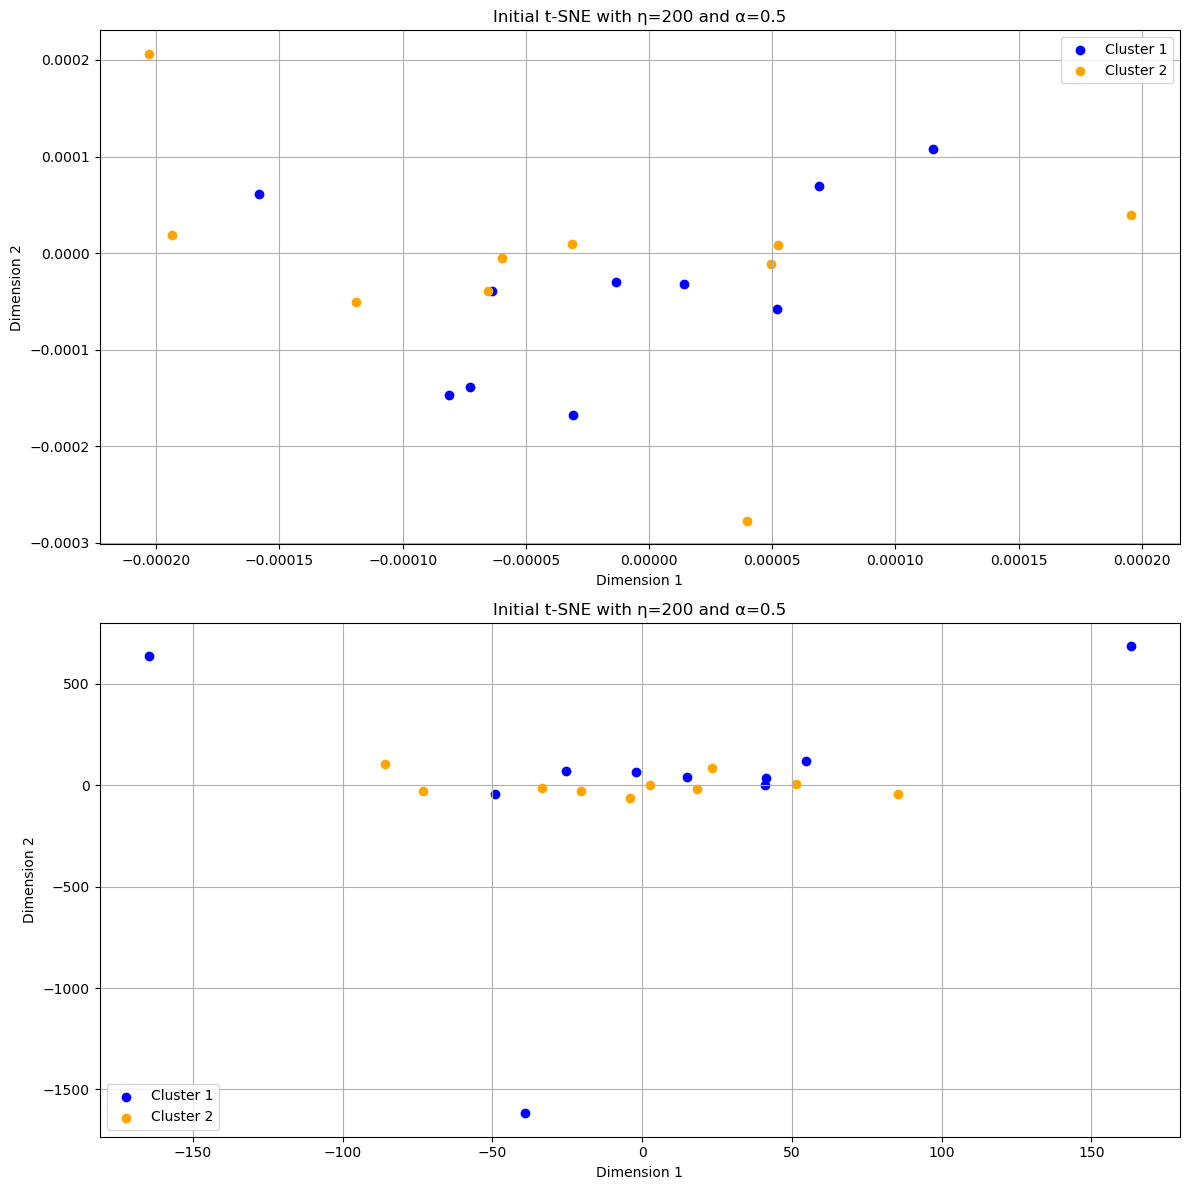

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Data
def generate_data():
    np.random.seed(0)
    mu1 = np.ones(10) * 1
    mu2 = np.ones(10) * 10
    cov = np.eye(10) * 0.01

    cluster1 = np.random.multivariate_normal(mu1, cov, 10)
    cluster2 = np.random.multivariate_normal(mu2, cov, 10)

    X = np.vstack((cluster1, cluster2))
    return X

def compute_pairwise_affinities(X, sigma):
    n = X.shape[0]
    P = np.zeros((n, n))

    # Compute pairwise affinities
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_squared = np.linalg.norm(X[i] - X[j])**2
                P[i, j] = np.exp(-distance_squared / (2 * sigma**2))

    # Compute the denominator: sum of all pairwise affinities
    denominator = np.sum(P)
    for i in range(n):
        P[i,i]=1
    # Normalize P by dividing by the denominator
    P /= denominator

    return P

def compute_symmetric_affinities(X, sigma):
    n = X.shape[0]
    P = compute_pairwise_affinities(X, sigma)
    P_symmetric = (P + P.T) / 2*n
    return P_symmetric

def compute_low_dim_affinities(Y):
    n = Y.shape[0]
    Q = np.zeros((n, n))

    # Compute pairwise affinities
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_squared = np.linalg.norm(Y[i] - Y[j])**2
                Q[i, j] = (1 + distance_squared)**(-1)

    # Compute the denominator
    denominator = np.sum(Q)
    for i in range(n):
        Q[i,i]=1


    # Normalize Q by dividing by the denominator
    Q /= denominator

    return Q

# Step 4: Compute KL Divergence
def kl_divergence(P, Q):
    return np.sum(P * np.log((P + 1e-10) / (Q + 1e-10)))

def t_SNE(X,  T=50, eta=200, alpha=0.5):
    n,d= X.shape
    P = compute_symmetric_affinities(X,0.1)
    Y_list=[]
    Y=  np.random.normal(0, 1e-4, (n, 2))
    Y_list.append(Y)
    Y=  np.random.normal(0, 1e-4, (n, 2))
    Y_list.append(Y)

    Q = compute_low_dim_affinities(Y)
    print(kl_divergence(P,Q))
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))
    axes[0].scatter(Y[:10, 0], Y[:10, 1], label='Cluster 1', color='blue')
    axes[0].scatter(Y[10:, 0], Y[10:, 1], label='Cluster 2', color='orange')
    axes[0].set_title(f'Initial t-SNE with η={eta} and α={alpha}')
    axes[0].set_xlabel('Dimension 1')
    axes[0].set_ylabel('Dimension 2')
    axes[0].legend()
    axes[0].grid(True)

    for t in range(1,T+1):
        Q = compute_low_dim_affinities(Y)
        PQ_diff = P - Q
        dY = np.zeros_like(Y)
        for i in range(n):
            for j in range(n):
                if i != j:
                    diff = Y[i] - Y[j]
                    norm_sq = np.linalg.norm(diff)**2
                    factor = (1 + norm_sq)**2
                    dY[i] += 4 * PQ_diff[i, j] * diff / factor
        Y += eta * dY + alpha*(Y_list[-1]-Y_list[-2])
        Y_list.append(Y)
    print(kl_divergence(P,Q))

    axes[1].scatter(Y[:10, 0], Y[:10, 1], label='Cluster 1', color='blue')
    axes[1].scatter(Y[10:, 0], Y[10:, 1], label='Cluster 2', color='orange')
    axes[1].set_title(f'Initial t-SNE with η={eta} and α={alpha}')
    axes[1].set_xlabel('Dimension 1')
    axes[1].set_ylabel('Dimension 2')
    axes[1].legend()
    axes[1].grid(True)
    plt.tight_layout()

X = generate_data()
t_SNE(X)


**Observations**
* As the iterations increase the Kl_Divergence decreases and the points are clustered than before

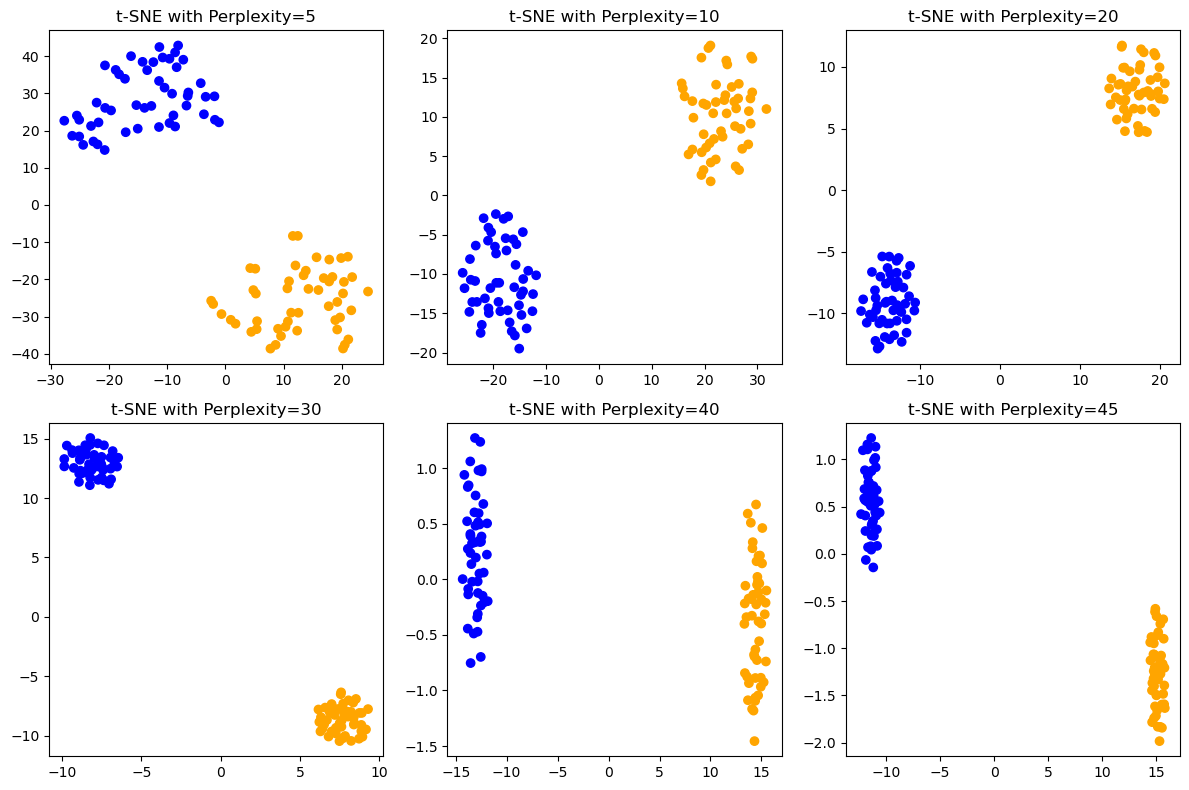

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Step 1: Generate Data
def generate_data():
    np.random.seed(42)
    mu1 = np.ones(10) * 1
    mu2 = np.ones(10) * 10
    cov = np.eye(10) * 0.01

    cluster1 = np.random.multivariate_normal(mu1, cov, 50)
    cluster2 = np.random.multivariate_normal(mu2, cov, 50)

    X = np.vstack((cluster1, cluster2))
    return X

# Step 2: t-SNE with different perplexity values
def apply_tsne(X, perplexities, n_iter=1000, random_state=42):
    results = {}
    for perplexity in perplexities:
        tsne = TSNE(perplexity=perplexity, n_iter=n_iter, random_state=random_state)
        Y = tsne.fit_transform(X)
        results[perplexity] = Y
    return results

# Step 3: Plot Results
def plot_tsne_results(results):
    plt.figure(figsize=(12, 8))
    for i, (perplexity, Y) in enumerate(results.items()):
        plt.subplot(2, 3, i + 1)
        plt.scatter(Y[:, 0], Y[:, 1], c=['blue'] * 50 + ['orange'] * 50)
        plt.title(f"t-SNE with Perplexity={perplexity}")
    plt.tight_layout()
    plt.show()

# Main execution
X = generate_data()
perplexities = [5, 10, 20,30,40,45]  # Updated perplexity values
tsne_results = apply_tsne(X, perplexities)

# Plot t-SNE results
plot_tsne_results(tsne_results)


* As perpexlity increases the clusters are better formed upto a certain value of perpexlity (close to n//2) and the formed clusters are not as good as the clusters that formed at n//2 after n//2